### Example notebook on how to truncate waveform by `flow`

In [28]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from gw_eccentricity.truncate_waveform_by_flow import truncate_waveform_by_flow
from gw_eccentricity.load_data import load_waveform
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict

Load an eccentric eob waveform

In [30]:
kwargs = {"filepath": "../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q1.00_chi1z0.00_chi2z0.00_EOBecc0.1973794859_Momega00.010_meanAno1.571.h5"}
dataDict = load_waveform("EOB", **kwargs)

Plot and see how the f22 looks

In [31]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, '$f_{22}$ [1/$M$]')

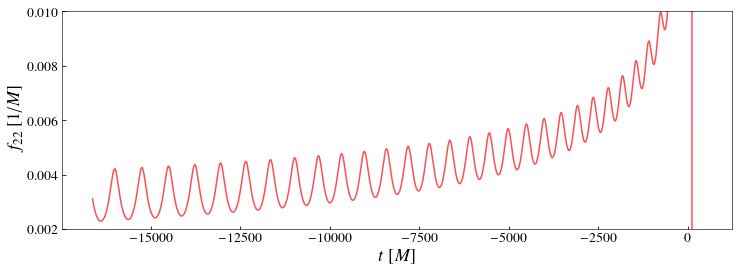

In [32]:
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi)
ax.set_ylim(0.002, 0.01)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")

Let's trucate the waveform using `flow=0.003`

In [33]:
?truncate_waveform_by_flow

Signature:
truncate_waveform_by_flow(
    dataDict=None,
    method='Amplitude',
    flow=None,
    spline_kwargs=None,
    extra_kwargs=None,
)
Docstring:
Truncate waveform by flow.

Eccentric waveforms have a non-monotonic instantaneous frequency.
Therefore, to truncate waveform by demanding the frequency of the waveform
is greater than a given minimum frequency, say flow, should be done
carefully since the instantaneous frequency can be equal to the given flow
at multiple points in time.

Also by demanding that the truncated waveform has frequencies that are
greater than or equal to the flow, we mean that at all times in the
truncated waveform the frequencies are >= flow. This could be done by using
the frequency interpolant omega22_a(t) through the apocenters because
1. It is monotonic function of time.
2. If at any time tref, omega22_a(tref) >= 2*pi*flow, then for t >= tref,
   frequencies would be > flow.
File:      ~/Eccentricity/gw_eccentricity/truncate_waveform_by_flow.py
Type

In [36]:
flow = 0.003
truncatedDict, gwecc_object = truncate_waveform_by_flow(
    dataDict=dataDict,
    flow=flow)

Now let's have a look at the f22 of these waveforms again

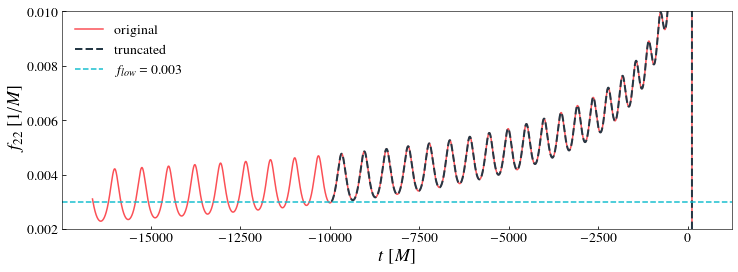

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label="original")
ax.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])))/2/np.pi, ls="--", lw=2, label="truncated")
ax.set_ylim(0.002, 0.01)
ax.set_ylabel("$f_{22}$")
ax.axhline(flow, c="tab:cyan", ls="--", label=f"$f_{{low}}={flow}$")
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")
ax.legend(loc="upper left")

Try a different `flow`

In [40]:
flow = 0.004
truncatedDict, gwecc_object = truncate_waveform_by_flow(
    dataDict=dataDict,
    flow=flow)

Now let's have a look at the f22 of these waveforms again

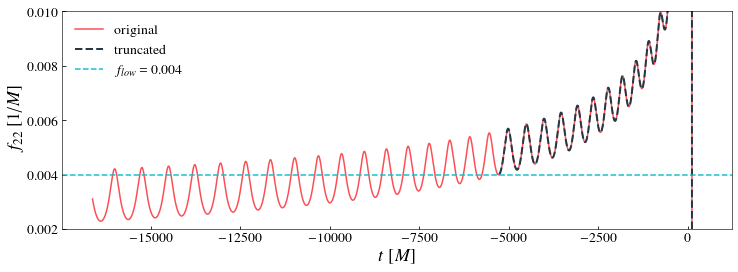

In [41]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label="original")
ax.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])))/2/np.pi, ls="--", lw=2, label="truncated")
ax.set_ylim(0.002, 0.01)
ax.set_ylabel("$f_{22}$")
ax.axhline(flow, c="tab:cyan", ls="--", label=f"$f_{{low}}={flow}$")
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")
ax.legend(loc="upper left")

Last one

In [52]:
flow = 0.0025
truncatedDict, gwecc_object = truncate_waveform_by_flow(
    dataDict=dataDict,
    flow=flow)

Now let's have a look at the f22 of these waveforms again

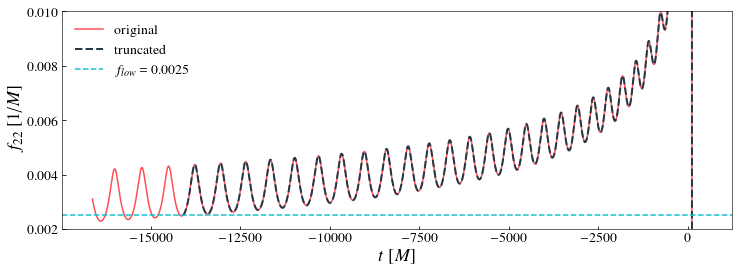

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label="original")
ax.plot(truncatedDict["t"], -np.gradient(np.unwrap(np.angle(truncatedDict["hlm"][(2, 2)])))/2/np.pi, ls="--", lw=2, label="truncated")
ax.set_ylim(0.002, 0.01)
ax.set_ylabel("$f_{22}$")
ax.axhline(flow, c="tab:cyan", ls="--", label=f"$f_{{low}}={flow}$")
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel("$f_{22}$ [1/$M$]")
ax.legend(loc="upper left")

Access info in `gwecc_object`

In [54]:
gwecc_object.f_low_for_truncating, gwecc_object.tlow_for_trucating

(0.0025, -14095.046027714583)

In [56]:
gwecc_object.f22_apocenters_interp, gwecc_object.t_apocenters_interp

(array([0.00228438, 0.00228446, 0.00228453, ..., 0.01143663, 0.01144732,
        0.01145803]),
 array([-16386.04602771, -16385.04602771, -16384.04602771, ...,
          -371.04602771,   -370.04602771,   -369.04602771]))

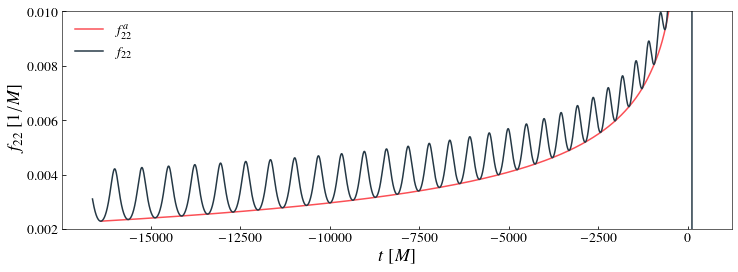

In [65]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(gwecc_object.t_apocenters_interp, gwecc_object.f22_apocenters_interp, label=r"$f^a_{22}$")
ax.set_ylabel(r"$f_{22}$ [$1/M$]")
ax.set_xlabel(labelsDict["t_dimless"])
ax.plot(dataDict["t"], -np.gradient(np.unwrap(np.angle(dataDict["hlm"][(2, 2)])))/2/np.pi, label=r"$f_{22}$")
ax.set_ylim(0.002, 0.01)
ax.legend()